<a href="https://colab.research.google.com/github/oneoftwo/KAIST_CH453_AI_chemistry/blob/main/assignments/assignment1/assignment_1_1_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

# Define the number of data points
num_points = 1000

# Generate 1000 equally spaced data points in the range [0, pi]
x = torch.linspace(0, np.pi, num_points)

# Compute the sine of each data point
y = torch.sin(x)

from torch.utils.data import TensorDataset, DataLoader

# Create a TensorDataset from x and y tensors
dataset = TensorDataset(x, y)

# Define a batch size
batch_size = 64

# Create a DataLoader for batching and shuffling the dataset
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [2]:
import torch
import torch.nn as nn

class TwoLayerMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerMLP, self).__init__()
        # Define the first linear layer
        self.linear1 = nn.Linear(input_size, hidden_size)

        # Define the second linear layer
        self.linear2 = nn.Linear(hidden_size, output_size)

        # Define the ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pass the input through the first linear layer, followed by ReLU activation
        x = self.relu(self.linear1(x))

        # Pass the result through the second linear layer
        x = self.linear2(x)

        return x

# Define the model with the appropriate input, hidden, and output sizes
# For a regression task like y = sin(x), input_size=1, output_size=1
input_size = 1
hidden_size = 64
output_size = 1

model = TwoLayerMLP(input_size, hidden_size, output_size)

# Print the model architecture
print(model)


TwoLayerMLP(
  (linear1): Linear(in_features=1, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)


In [3]:
# Define the Mean Squared Error Loss
criterion = nn.MSELoss()

# Define the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define the number of training epochs
epochs = 100

# Training loop
for epoch in range(epochs):
    for batch_x, batch_y in train_loader:
        # Make sure the input tensor has the correct shape [batch_size, input_size]
        batch_x = batch_x.view(-1, 1)

        # Forward pass
        outputs = model(batch_x)

        # Compute the loss
        loss = criterion(outputs, batch_y.view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss for each epoch
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.1065
Epoch [11/100], Loss: 0.0002
Epoch [21/100], Loss: 0.0000
Epoch [31/100], Loss: 0.0000
Epoch [41/100], Loss: 0.0000
Epoch [51/100], Loss: 0.0000
Epoch [61/100], Loss: 0.0000
Epoch [71/100], Loss: 0.0000
Epoch [81/100], Loss: 0.0000
Epoch [91/100], Loss: 0.0000


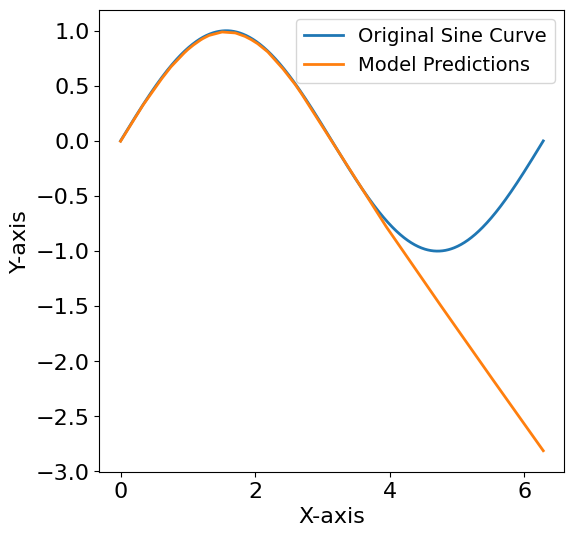

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_inference and y_pred are defined elsewhere and are tensors
# Convert tensors to numpy arrays for plotting
x_inference_np = x_inference.numpy().flatten()
y_pred_np = y_pred.numpy().flatten()

# Create a plot
plt.figure(figsize=(6, 6))  # Increase the figure size for better visibility

# Plot the original sine curve
plt.plot(x_inference_np, np.sin(x_inference_np), label='Original Sine Curve', linewidth=2)

# Plot the model's predictions
plt.plot(x_inference_np, y_pred_np, label='Model Predictions', linewidth=2)

# Enhance tick marks and labels
plt.xticks(fontsize=16)  # Increase x-axis tick font size
plt.yticks(fontsize=16)  # Increase y-axis tick font size

# Set larger labels for both axes
plt.xlabel('X-axis', fontsize=16)
plt.ylabel('Y-axis', fontsize=16)

# Show the legend with a larger font
plt.legend(fontsize=14)

# Optionally, increase the overall font size for all elements
plt.rcParams.update({'font.size': 16})

# Display the plot
plt.show()